In [ ]:
# Change locale to UTF-8
!export LC_ALL=C.UTF-8
!export LANG=C.UTF-8

# Install the ultralytics package
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 15.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Lux/Final

/content/drive/MyDrive/Lux/Final


In [ ]:
import os

# Define directories
train_dir = '/content/drive/MyDrive/Lux/Final/train/images'
val_dir = '/content/drive/MyDrive/Lux/Final/val/images'
test_dir = '/content/drive/MyDrive/Lux/Final/test/images'

# Check if directories exist
print(f"Train directory exists: {os.path.exists(train_dir)}")
print(f"Validation directory exists: {os.path.exists(val_dir)}")
print(f"Test directory exists: {os.path.exists(test_dir)}")

# List some files
print("Train images:", os.listdir(train_dir)[:5])
print("Validation images:", os.listdir(val_dir)[:5])
print("Test images:", os.listdir(test_dir)[:5])


Train directory exists: True
Validation directory exists: True
Test directory exists: True
Train images: ['Floating sunglasses.jpeg', 'Float Away in Style with Polarized Sunglasses - Green Mirror Coating UV400 Protection.jpeg', 'Bolle Airfin _ Matte Grey and Acid_Sky Blue Polarised Lenses.jpeg', 'Child Sunglasses Swimming Pool Little Girl Stock Photo 1125600029 _ Shutterstock.jpeg', 'Cressi, Unisex, Sonnenbrille, Bahia Sunglasses.jpeg']
Validation images: ['GoPro’s New Floating Sunglasses Are a Summertime Essential.jpeg', 'Kids Bamboo (6-12 yrs) - Blue Mirror.jpeg', 'Hand woodburned bamboo sunglasses_ UV400 Polarized….jpeg', 'Heureuse comme tout dans sa bouée pour bébé 😍.jpeg', 'Hand woodburned bamboo sunglasses_ UV400 Polarized… (1).jpeg']
Test images: ['Outdoor Polarized Floating Sunglasses Sports - Red.jpeg', 'OCEAN MENTAWAY Water Sports Floating Sunglasses Polarized Kiteboarding Surf.jpeg', 'Oversized Visor Sunglasses.jpeg', 'Oakley Radar® EV Path® 38mm Prizm™ Wrap Shield Sungla

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model (e.g., yolov8n.pt for YOLOv8 Nano)
model = YOLO('yolov8n.pt')

# Train the model
model.train(
    data='/content/drive/MyDrive/Lux/Final/lux1.yaml',  # Path to your dataset YAML file
    epochs=30,            # Number of training epochs
    batch=16,             # Batch size for training
    imgsz=640,            # Image size for training and validation
    lr0=0.01,             # Initial learning rate
    weight_decay=0.0005,  # Weight decay (L2 regularization)
    momentum=0.937,       # Momentum in SGD optimizer
    optimizer='Adam',     # Optimizer type
    cos_lr=True           # Use cosine learning rate scheduler
)

# Save the model after training
model.save('/content/drive/MyDrive/Lux/Final/trained_model.pt')  # Path to save the trained model


Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Lux/Final/lux1.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

100%|██████████| 755k/755k [00:00<00:00, 102MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /content/drive/MyDrive/Lux/Final/train/labels.cache... 200 images, 2 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Lux/Final/val/labels.cache... 45 images, 1 backgrounds, 0 corrupt: 100%|██████████| 46/46 [00:00<?, ?it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train8
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.21G      1.663      3.124      1.788         29        640: 100%|██████████| 13/13 [00:20<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         46         69      0.394      0.136     0.0679     0.0171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.16G       1.86      2.517      1.884         28        640: 100%|██████████| 13/13 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         46         69     0.0371      0.164      0.025    0.00831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.15G      1.966      2.475      1.973         20        640: 100%|██████████| 13/13 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all         46         69    0.00345      0.621    0.00348    0.00124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.24G      1.946      2.373      1.895         31        640: 100%|██████████| 13/13 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         46         69     0.0105      0.369    0.00663    0.00127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.25G      1.903      2.309      1.935         31        640: 100%|██████████| 13/13 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         46         69   9.99e-05     0.0381   0.000343   0.000527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.25G      1.926      2.259      1.898         22        640: 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         46         69   0.000146     0.0571   9.65e-05   1.94e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.23G      1.828      2.163      1.834         28        640: 100%|██████████| 13/13 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         46         69    0.00145      0.488    0.00255   0.000957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.25G      1.843      2.136       1.84         27        640: 100%|██████████| 13/13 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]


                   all         46         69     0.0107      0.326    0.00971    0.00409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.22G      1.816      2.117      1.855         19        640: 100%|██████████| 13/13 [00:05<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         46         69      0.367      0.371     0.0162    0.00706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.24G      1.806      2.001      1.768         26        640: 100%|██████████| 13/13 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         46         69      0.676      0.019    0.00736    0.00253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.28G       1.77      2.029      1.796         22        640: 100%|██████████| 13/13 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         46         69     0.0341       0.36     0.0547     0.0212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.23G      1.781      1.916      1.757         30        640: 100%|██████████| 13/13 [00:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]


                   all         46         69      0.718      0.019     0.0258    0.00869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.24G      1.699      1.861      1.712         19        640: 100%|██████████| 13/13 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         46         69      0.693      0.162     0.0484     0.0186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.25G      1.715      1.786      1.674         26        640: 100%|██████████| 13/13 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         46         69        0.8      0.133      0.144     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.25G       1.69      1.808      1.678         30        640: 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         46         69      0.764      0.276      0.234      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.25G      1.608      1.712      1.634         22        640: 100%|██████████| 13/13 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         46         69      0.282      0.431      0.234       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.22G      1.558      1.702      1.607         25        640: 100%|██████████| 13/13 [00:05<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         46         69      0.476      0.463      0.242        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.25G       1.53      1.683      1.574         30        640: 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         46         69      0.201      0.526      0.235      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.25G      1.558      1.668      1.587         30        640: 100%|██████████| 13/13 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         46         69      0.193       0.39      0.232      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.23G      1.466      1.579      1.547         19        640: 100%|██████████| 13/13 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         46         69      0.317      0.612      0.363      0.173


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.23G      1.452      1.623      1.615         16        640: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         46         69      0.407      0.674      0.443      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.23G      1.426      1.543      1.578         15        640: 100%|██████████| 13/13 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         46         69       0.68      0.572      0.498      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.23G      1.395      1.499      1.548         20        640: 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         46         69      0.686      0.567      0.491      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.23G      1.423      1.465      1.581         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         46         69      0.667       0.55      0.488      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.22G      1.375      1.395      1.487         14        640: 100%|██████████| 13/13 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         46         69      0.657      0.587      0.468      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.23G      1.371      1.322      1.492         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         46         69      0.645      0.571      0.489      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.23G      1.376      1.292      1.549         12        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         46         69      0.319      0.815      0.507       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.23G      1.335        1.3      1.514         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         46         69      0.334      0.829      0.516      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.22G      1.331      1.286       1.51         16        640: 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         46         69      0.372      0.855      0.532      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.24G      1.318      1.255      1.458         14        640: 100%|██████████| 13/13 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         46         69      0.372      0.855       0.53      0.325



30 epochs completed in 0.062 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 6.2MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]


                   all         46         69      0.371      0.855      0.528      0.324
          Contact Lens         15         35      0.371      0.914       0.49      0.297
         Optical Glass         14         14      0.327          1      0.619      0.417
              Sunglass         16         20      0.415       0.65      0.475      0.258
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/train8


In [ ]:
# Optionally, evaluate the model after training
metrics = model.val(data='/content/drive/MyDrive/Lux/Final/lux1.yaml')
print(metrics)

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 4.09MB/s]
val: Scanning /content/drive/MyDrive/Lux/Final/val/labels.cache... 45 images, 1 backgrounds, 0 corrupt: 100%|██████████| 46/46 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.45s/it]


                   all         46         69      0.569      0.888      0.745      0.485
          Contact Lens         15         35      0.434      0.857      0.638      0.391
         Optical Glass         14         14      0.642      0.857      0.817      0.621
              Sunglass         16         20      0.631       0.95      0.782      0.442
Speed: 2.5ms preprocess, 5.0ms inference, 0.0ms loss, 19.0ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a9c5a31ff40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0


image 1/1 /content/drive/MyDrive/Lux/Final/train/images/coll.png: 640x640 1 Contact Lens, 1 Optical Glass, 2 Sunglasss, 7.5ms
Speed: 3.2ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


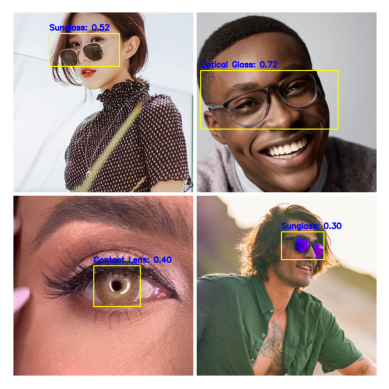

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model = YOLO('runs/detect/train3/weights/best.pt')

# Perform inference on an image
image_path = '/content/drive/MyDrive/Lux/Final/train/images/coll.png'
results = model(image_path)

# Get the class names from the model
class_names = model.names  # This should contain the class names from your dataset

# Display the image with detected bounding boxes
img = cv2.imread(image_path)

for result in results[0].boxes:
    x1, y1, x2, y2 = map(int, result.xyxy[0])
    confidence = result.conf[0]
    class_id = int(result.cls[0])  # Convert class ID to integer
    class_name = class_names[class_id]  # Get the class name from the model

    # Draw bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 255), 2)

    # Put class name and confidence score with improved visibility
    label = f"{class_name}: {confidence:.2f}"
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 2, cv2.LINE_AA)

# Convert BGR to RGB and plot using matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model = YOLO('runs/detect/train3/weights/best.pt')

# Path to the video file
video_path = '/content/drive/MyDrive/Lux/Final/train/images/titan.mp4'
cap = cv2.VideoCapture(video_path)

# Get the class names from the model
class_names = model.names  # This should contain the class names from your dataset

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform inference on the frame
    results = model(frame)

    for result in results[0].boxes:
        x1, y1, x2, y2 = map(int, result.xyxy[0])
        confidence = result.conf[0]
        class_id = int(result.cls[0])  # Convert class ID to integer
        class_name = class_names[class_id]  # Get the class name from the model

        # Draw bounding box
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 255), 2)

        # Put class name and confidence score with improved visibility
        label = f"{class_name}: {confidence:.2f}"
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 2, cv2.LINE_AA)

    # Convert BGR to RGB and display the frame using matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()

    # Press 'q' to exit the loop (optional)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
